<a href="https://colab.research.google.com/github/vinnu0309/Sentiment-Analysis/blob/main/airline_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
airline_reviews_df=read.csv("/content/preprocessed_airline_dataset.csv")
column_names=colnames(airline_reviews_df)

In [ ]:
print(column_names)

 [1] "header"              "author"              "date"               
 [4] "place"               "content"             "aircraft"           
 [7] "traveller_type"      "seat_type"           "route"              
[10] "date_flown"          "recommended"         "trip_verified"      
[13] "rating"              "seat_comfort"        "cabin_staff_service"
[16] "food_beverages"      "ground_service"      "value_for_money"    
[19] "entertainment"      


In [ ]:
# Install and load necessary libraries
install.packages("tidytext")
install.packages("dplyr")
install.packages("stringr")
install.packages("tm")
install.packages("syuzhet")
install.packages("text2vec")

library(tidytext)
library(dplyr)
library(stringr)
library(tm)
library(syuzhet)
library(text2vec)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshape’, ‘zoo’, ‘dtt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘MatrixExtra’, ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘rsparse’, ‘mlapi’, ‘lgr’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, 

In [ ]:
install.packages("text2vec")
library(text2vec)
airline_reviews_df=read.csv("/content/preprocessed_airline_dataset.csv")
# Example: Read content column from dataframe
content_text <- airline_reviews_df$content

# Clean and tokenize text data
clean_text <- content_text %>%
  tolower() %>%                              # Convert to lowercase
  str_replace_all("[^a-zA-Z]", " ") %>%     # Remove non-alphabetic characters
  str_squish()                          # Remove extra whitespace

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
clean_text_tokens <- word_tokenizer(clean_text)
clean_text_tokens <- as.character(clean_text_tokens)
# Get sentiment scores for each review
sentiment_scores <- get_nrc_sentiment(clean_text_tokens)

# Extract specific emotions of interest (e.g., joy, sadness, anger)
emotions <- data.frame(sentiment_scores)

# Add emotions to the original dataframe
airline_reviews_df$emotions <- emotions
head(emotions)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,2,1,1,2,1,2,4,4
2,1,2,4,3,0,4,2,6,10,11
3,3,1,1,3,0,4,0,2,7,1
4,1,4,1,2,0,4,1,5,5,4
5,2,0,1,1,0,3,0,1,4,0
6,1,5,2,1,2,4,3,3,8,6


# New Section

In [ ]:
# Convert sentiment scores to a numeric vector
sentiment_scores_numeric <- unlist(sentiment_scores)

# Identify index of most positive and negative reviews
most_positive_index <- which.max(sentiment_scores_numeric)
most_negative_index <- which.min(sentiment_scores_numeric)

# Get most positive and negative reviews
most_positive_review <- airline_reviews_df[most_positive_index, "content"]
most_negative_review <- airline_reviews_df[most_negative_index, "content"]

# Print most positive and negative reviews
print("Most Positive Review:")
print(most_positive_review)
print("Most Negative Review:")
print(most_negative_review)


[1] "Most Positive Review:"
[1] NA
[1] "Most Negative Review:"
[1] "  My initial flight was cancelled 8 hours prior the flight. Then I was automatically rescheduled for next day. Next day, the flight was delayed leaving Hamburg and missed my connecting flight to Las Vegas. Me and several other passengers spent the night in London. British Airways provided us with vouchers but the transfer bus dropped us at the wrong hotel (closest to our hotel) and told us that we can walk there if we want to. As a result, I lost two nights hotel reservations that I made in las Vegas. I opened a claim and provided all receipts to British Airways to get refund of my hotel reservations, but over 5 weeks now, not a single feedback from British Airways. I will avoid all flights with them in future, and will share this story."


In [ ]:
# Convert sentiment scores to a data frame
emotions_df <- data.frame(sentiment_scores)

# Add emotions to the original dataframe
airline_reviews_df$emotions <- emotions_df
# Calculate average sentiment score for each review
average_sentiment <- rowMeans(emotions_df)

# Identify index of most positive review
most_positive_index <- which.max(average_sentiment)

# Get most positive review
most_positive_review <- airline_reviews_df$content[most_positive_index]

# Print most positive review
print("Most Positive Review:")
print(most_positive_review)



[1] "Most Positive Review:"
[1] "  Toronto to Berlin via London on miles in a mix of classes. First class check in at Toronto was good with friendly staff. A fast priority security lane had me in the first lounge in 15 mins. Unfortunately first lounge was full (of gold card members) and so had to sit in the Biz lounge. Good menu to eat on the ground and decent selection of wine and beers. Fast boarding once it started and greeted at the door and taken to 2A. Excellent rose champagne served by friendly and professional crew. A weird but tasty starter of a cured / dried salmon followed by steak which was well cooked. Good cheeses and all courses selected were available. After some decent sleep, a fast breakfast served as late as possible ended a decent flight. T5 North lounge was packed with a 20 min wait for a shower which are now looking tatty and dirty. Decent breakfast selection of hot rolls, fruit, cereals etc. Quick board for the flight to Berlin. Ridiculous leg room -at 30 inches 

In [ ]:
# Search for specific issues in reviews
seat_discomfort_reviews <- airline_reviews_df %>%
  filter(grepl("seat discomfort", content, ignore.case = TRUE) | seat_comfort < 3)
attendant_discomfort_reviews <- airline_reviews_df %>%
  filter(grepl("flight attendant discomfort", content_text, ignore.case = TRUE) | cabin_staff_service<3)
luggage_issues_reviews <- airline_reviews_df %>%
  filter(grepl("luggage", content_text, ignore.case = TRUE))
entertainment_issues_reviews <- airline_reviews_df %>%
  filter(grepl("entertainment discomfort", content_text, ignore.case = TRUE) | entertainment < 2)

# Print details of specific issues
print("Reviews mentioning Seat Discomfort:")
head(seat_discomfort_reviews)
print("Reviews mentioning Flight Attendant Discomfort:")
head(attendant_discomfort_reviews)
print("Reviews mentioning Luggage Issues:")
head(luggage_issues_reviews)
print("Reviews mentioning Entertainment Issues:")
head(entertainment_issues_reviews)


[1] "Reviews mentioning Seat Discomfort:"


ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 6,
 but FUN(X[[20]]) result is length 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

[1] "Reviews mentioning Flight Attendant Discomfort:"


ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 6,
 but FUN(X[[20]]) result is length 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

[1] "Reviews mentioning Luggage Issues:"


ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 6,
 but FUN(X[[20]]) result is length 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

[1] "Reviews mentioning Entertainment Issues:"


ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 6,
 but FUN(X[[20]]) result is length 10

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

In [ ]:
# Load required libraries
library(dplyr)

# Search for specific issues in reviews
seat_discomfort_reviews <- airline_reviews_df %>%
  filter(grepl("seat discomfort", content, ignore.case = TRUE) | seat_comfort < 3)

attendant_discomfort_reviews <- airline_reviews_df %>%
  filter(grepl("flight attendant discomfort", content, ignore.case = TRUE) | cabin_staff_service < 3)

luggage_issues_reviews <- airline_reviews_df %>%
  filter(grepl("luggage", content, ignore.case = TRUE))

entertainment_issues_reviews <- airline_reviews_df %>%
  filter(grepl("entertainment discomfort", content, ignore.case = TRUE) | entertainment < 2)

# Print details of specific issues
cat("Reviews mentioning Seat Discomfort:\n")
print(slice_head(seat_discomfort_reviews, n = 6))

cat("\nReviews mentioning Flight Attendant Discomfort:\n")
print(slice_head(attendant_discomfort_reviews, n = 6))

cat("\nReviews mentioning Luggage Issues:\n")
print(slice_head(luggage_issues_reviews, n = 6))

cat("\nReviews mentioning Entertainment Issues:\n")
print(slice_head(entertainment_issues_reviews, n = 6))


Reviews mentioning Seat Discomfort:
                                      header        author       date
1               service was mediocre at best   Gary Storer 03-10-2023
2           BA standards continue to decline      A Jensen 02-10-2023
3               won the race to the bottom"   John Rockett 02-10-2023
4                          Very disappointed    Tom Slowbe 28-09-2023
5             the service was shockingly bad    E Anderson 28-09-2023
6 not a single feedback from British Airways Selcuk Benter 20-09-2023
           place
1 United Kingdom
2 United Kingdom
3 United Kingdom
4  United States
5 United Kingdom
6        Germany
                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Function to preprocess text data
preprocess_text <- function(text_data) {
  cleaned_text <- text_data %>%
    tolower() %>%
    removeNumbers() %>%
    removePunctuation() %>%
    stripWhitespace()
  return(cleaned_text)
}

# Function to perform sentiment analysis
perform_sentiment_analysis <- function(cleaned_text) {
  sentiment_scores <- get_nrc_sentiment(cleaned_text)
  emotions_df <- data.frame(sentiment_scores)
  return(emotions_df)
}

# Function to generate detailed analysis report
generate_analysis_report <- function(df) {
  num_reviews <- nrow(df)
  average_rating <- mean(df$rating)
  most_common_aircraft <- names(sort(table(df$aircraft), decreasing = TRUE))[1]

  # Identify most positive and negative reviews
  average_sentiment <- rowMeans(df[, 8:15])  # Assuming emotions are in columns 8 to 15
  most_positive_index <- which.max(average_sentiment)
  most_negative_index <- which.min(average_sentiment)
  most_positive_review <- df$content[most_positive_index]
  most_negative_review <- df$content[most_negative_index]

  # Generate report
  report <- paste("Analysis Report:\n",
                  "Total Number of Reviews:", num_reviews, "\n",
                  "Average Rating:", round(average_rating, 2), "\n",
                  "Most Common Aircraft:", most_common_aircraft, "\n",
                  "Most Positive Review:", most_positive_review, "\n",
                  "Most Negative Review:", most_negative_review, "\n")
  return(report)
}


In [ ]:
# Load required libraries
library(dplyr)

# Search for specific issues in reviews and extract content
seat_discomfort_content <- airline_reviews_df %>%
  filter(grepl("seat discomfort", content, ignore.case = TRUE) | seat_comfort < 3) %>%
  pull(content) %>%
  head(5)

attendant_discomfort_content <- airline_reviews_df %>%
  filter(grepl("flight attendant discomfort", content, ignore.case = TRUE) | cabin_staff_service < 3) %>%
  pull(content) %>%
  head(5)

luggage_issues_content <- airline_reviews_df %>%
  filter(grepl("luggage", content, ignore.case = TRUE)) %>%
  pull(content) %>%
  head(5)

entertainment_issues_content <- airline_reviews_df %>%
  filter(grepl("entertainment discomfort", content, ignore.case = TRUE) | entertainment < 2) %>%
  pull(content) %>%
  head(5)

# Print content of specific issues (top 5 rows)
cat("Reviews mentioning Seat Discomfort:\n")
cat(seat_discomfort_content, sep = "\n")

cat("\nReviews mentioning Flight Attendant Discomfort:\n")
cat(attendant_discomfort_content, sep = "\n")

cat("\nReviews mentioning Luggage Issues:\n")
cat(luggage_issues_content, sep = "\n")

cat("\nReviews mentioning Entertainment Issues:\n")
cat(entertainment_issues_content, sep = "\n")


Reviews mentioning Seat Discomfort:
 Just returned from Chicago, flew out 10 days ago on American Airlines absolutely superb in every way, had high expectations on return flight with BA. What a disappointment. The Airbus A380 may be nice from a pilots perspective but as a passenger it was awful. Very uncomfortable seats, the inflight entertainment and flight tracker failed to work throughout the flight, the inflight meal was inedible and the service was mediocre at best. Our short flight from Heathrow to Manchester was much improved, very welcoming and attentive in flight staff and the flight even arrived early. In future we will travel with one of the American carriers.
  BA standards continue to decline every time I fly with them. This time, a 45 min late departure, which seems the norm for BA, and no information from the rude and clueless boarding gate staff. The Club lounge was overcrowded, dirty and grubby and cleaning staff could not cope. How many more cutbacks is BA going to ap

In [ ]:
analyze_airline_reviews <- function(airline_reviews_df) {
  tryCatch({
    # Preprocess text data
    cleaned_text <- preprocess_text(airline_reviews_df$content)

    # Perform sentiment analysis
    emotions_df <- perform_sentiment_analysis(cleaned_text)

    # Merge sentiment scores with original dataframe
    airline_reviews_df <- cbind(airline_reviews_df, emotions_df)

    # Generate detailed analysis report
    analysis_report <- generate_analysis_report(airline_reviews_df)

    # Print analysis report
    cat(analysis_report)
  }, error = function(e) {
    message("An error occurred during analysis:", e$message)
  })
}


In [ ]:
# Example usage:
# Assuming airline_reviews_df is your dataframe containing airline reviews

# Load the data (if not already loaded)
# airline_reviews_df <- read.csv("path_to_your_data.csv")

# Execute the analysis and generate report
analyze_airline_reviews(airline_reviews_df)


An error occurred during analysis:'x' must be numeric



Problem Statement 1: Identify Most Common Emotions Expressed in Reviews Description: Analyze the airline reviews to identify the most common emotions expressed by passengers. Understand the predominant sentiments conveyed in the reviews.

Approach:

Perform sentiment analysis on the reviews to generate emotion scores (e.g., joy, anger, sadness). Calculate the frequency or proportion of each emotion across all reviews. Visualize the distribution of emotions using a bar plot or pie chart.



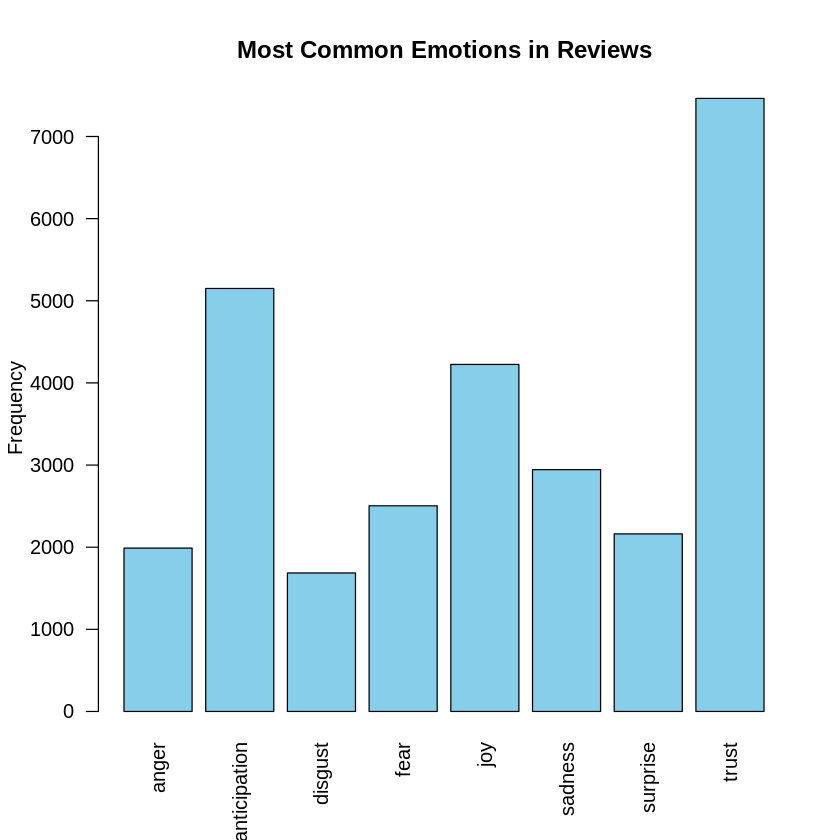

In [ ]:
# Visualize most common emotions expressed
emotion_counts <- colSums(emotions_df[, 1:8])  # Assuming emotions are in columns 1 to 8
barplot(emotion_counts, main = "Most Common Emotions in Reviews",
        ylab = "Frequency", col = "skyblue", las = 2)


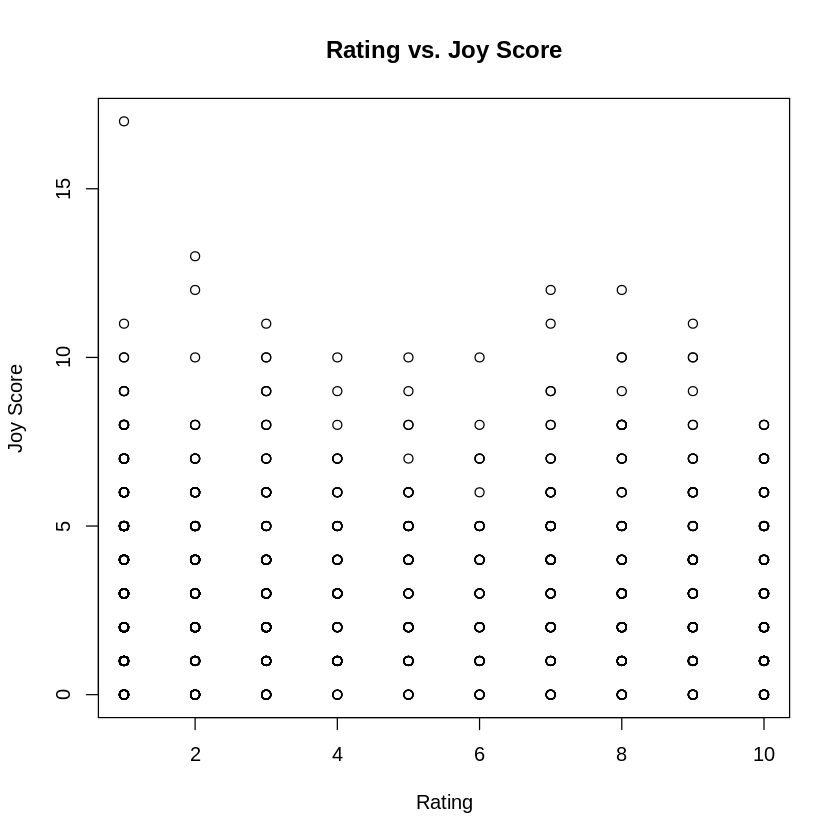

In [ ]:
# Scatter plot of sentiment scores vs. ratings
plot(airline_reviews_df$rating, emotions_df$joy,
     xlab = "Rating", ylab = "Joy Score", main = "Rating vs. Joy Score")


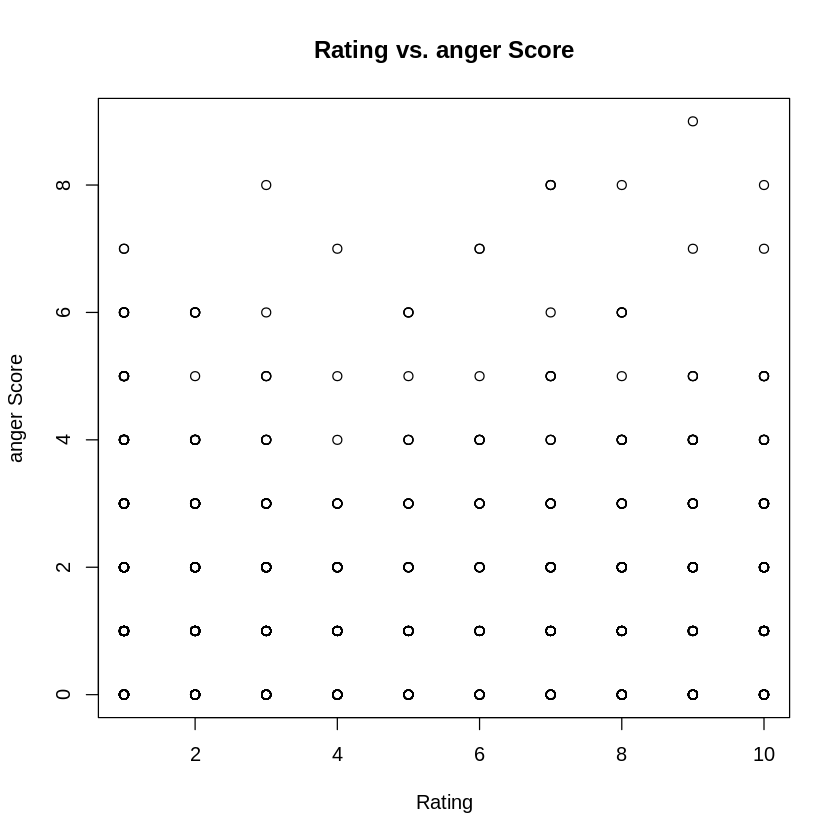

In [ ]:
plot(airline_reviews_df$rating, emotions_df$anger,
     xlab = "Rating", ylab = "anger Score", main = "Rating vs. anger Score")

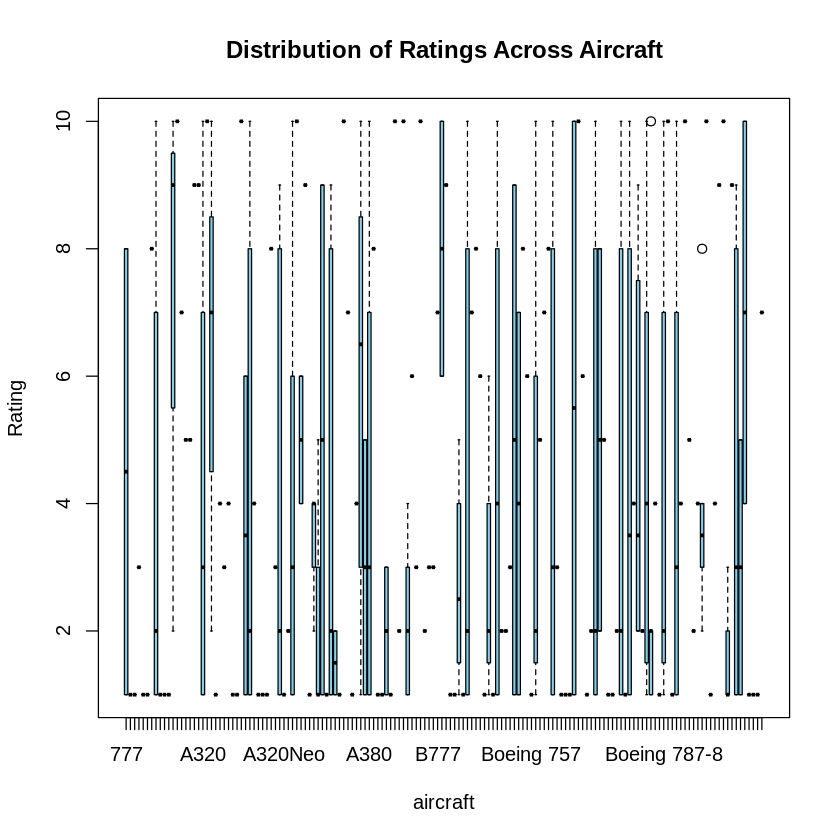

In [ ]:
# Box plot of ratings grouped by aircraft
boxplot(rating ~ aircraft, data = airline_reviews_df,
        main = "Distribution of Ratings Across Aircraft", ylab = "Rating", col = "skyblue")



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




aircraft_data
                               777                   777-300 and A320 
                                 2                                  1 
                               787                                A19 
                                 1                                  1 
                              A219                               A230 
                                 1                                  1 
                              A318                               A319 
                                 1                                 69 
          A319 / A380 / Boeing 737                  A319 / Boeing 747 
                                 1                                  1 
             A319 / Boeing 747-400                  A319 / Boeing 777 
                                 1                                  3 
               A319 / Boeing 787-8                A319 / Boeing 787-9 
                                 1                             

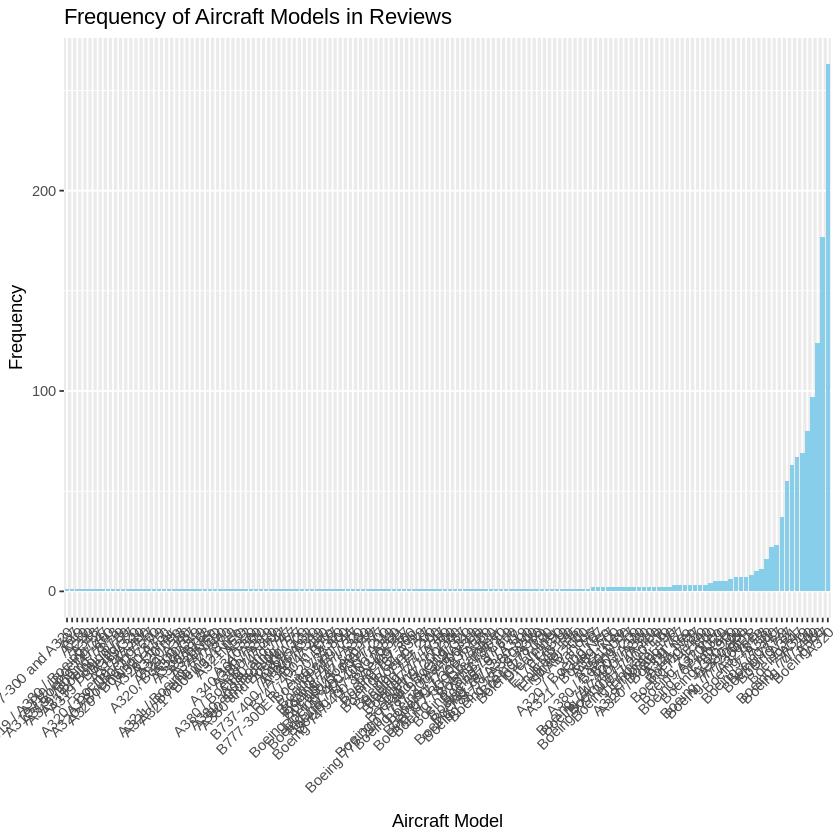

In [ ]:
# Load necessary packages
library(ggplot2)  # for visualization

# Assuming airline_reviews_df is your dataframe containing airline reviews

# Step 1: Extract and clean aircraft data
aircraft_data <- airline_reviews_df$aircraft

# Step 2: Calculate frequencies of each aircraft model
aircraft_freq <- table(aircraft_data)

print(aircraft_freq)
# Convert aircraft frequency table to data frame for plotting
aircraft_freq_df <- data.frame(aircraft = names(aircraft_freq),
                               frequency = as.numeric(aircraft_freq))

# Sort aircraft by frequency in descending order
aircraft_freq_df <- aircraft_freq_df[order(-aircraft_freq_df$frequency), ]

# Step 3: Visualize aircraft frequency using a bar plot
ggplot(aircraft_freq_df, aes(x = reorder(aircraft, frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Frequency of Aircraft Models in Reviews",
       x = "Aircraft Model",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


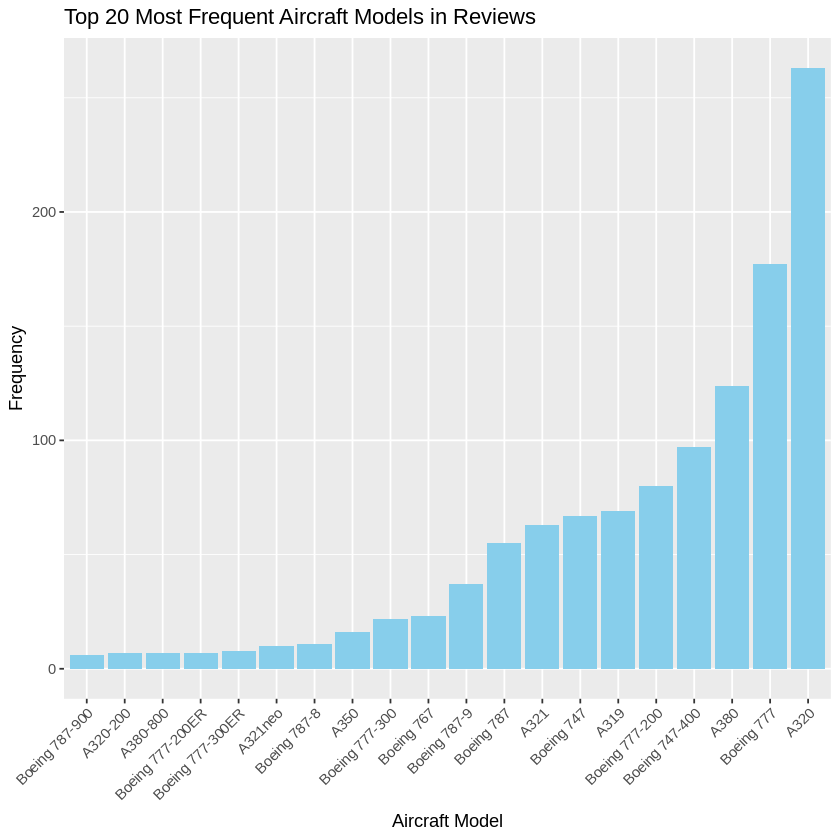

In [ ]:
# Load necessary packages
library(ggplot2)  # for visualization

# Assuming airline_reviews_df is your dataframe containing airline reviews

# Step 1: Extract and clean aircraft data
aircraft_data <- airline_reviews_df$aircraft

# Step 2: Calculate frequencies of each aircraft model
aircraft_freq <- table(aircraft_data)

# Convert aircraft frequency table to data frame for plotting
aircraft_freq_df <- data.frame(aircraft = names(aircraft_freq),
                               frequency = as.numeric(aircraft_freq))

# Sort aircraft by frequency in descending order and select top 20
top_aircraft_freq_df <- head(aircraft_freq_df[order(-aircraft_freq_df$frequency), ], 20)

# Step 3: Visualize top 20 aircraft frequency using a bar plot
ggplot(top_aircraft_freq_df, aes(x = reorder(aircraft, frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 20 Most Frequent Aircraft Models in Reviews",
       x = "Aircraft Model",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


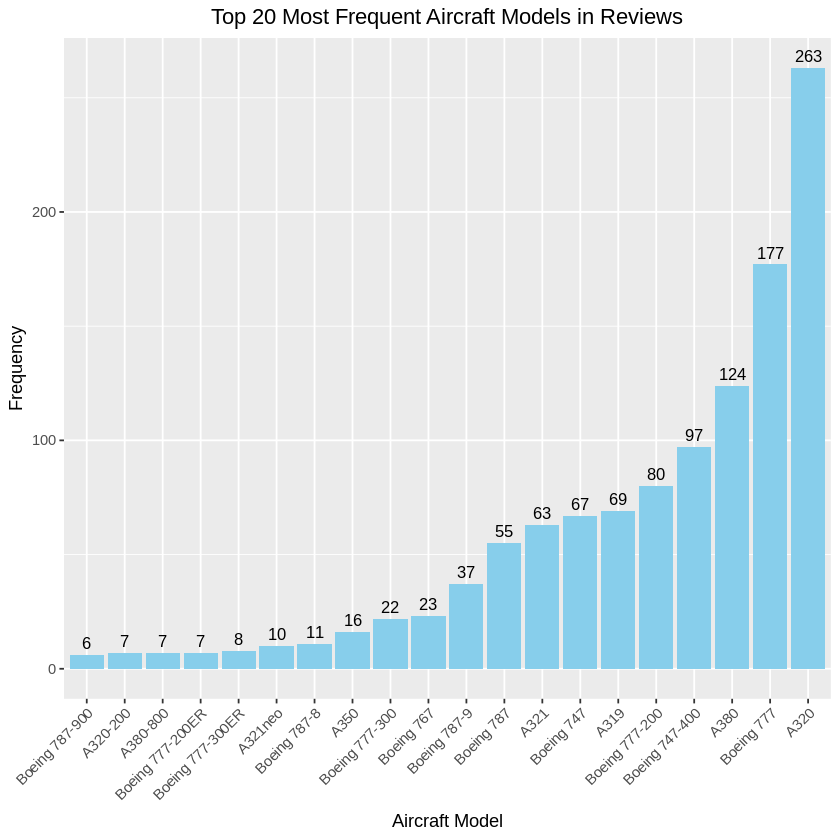

In [ ]:
# Load necessary packages
library(ggplot2)  # for visualization

# Assuming airline_reviews_df is your dataframe containing airline reviews

# Step 1: Extract and clean aircraft data
aircraft_data <- airline_reviews_df$aircraft

# Step 2: Calculate frequencies of each aircraft model
aircraft_freq <- table(aircraft_data)

# Convert aircraft frequency table to data frame for plotting
aircraft_freq_df <- data.frame(aircraft = names(aircraft_freq),
                               frequency = as.numeric(aircraft_freq))

# Sort aircraft by frequency in descending order and select top 20
top_aircraft_freq_df <- head(aircraft_freq_df[order(-aircraft_freq_df$frequency), ], 20)

# Step 3: Visualize top 20 aircraft frequency using a bar plot
ggplot(top_aircraft_freq_df, aes(x = reorder(aircraft, frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 3.5, color = "black") +  # Add frequency labels on top of bars
  labs(title = "Top 20 Most Frequent Aircraft Models in Reviews",
       x = "Aircraft Model",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))


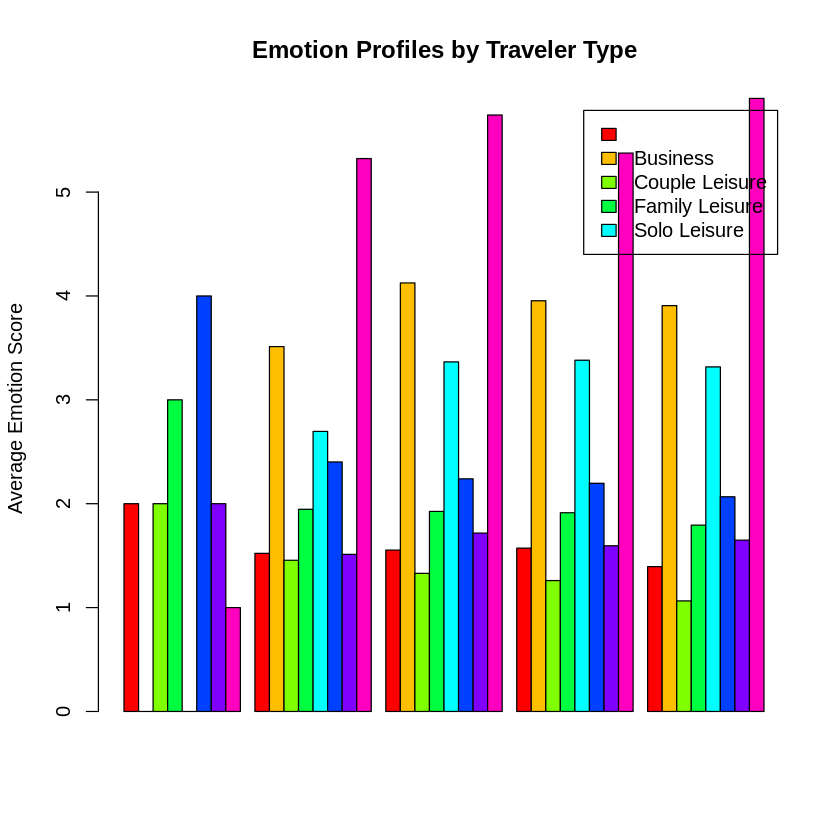

In [ ]:
# Assuming airline_reviews_df is your dataframe containing airline reviews

# Step 1: Calculate average emotion scores by traveler type
emotion_means <- aggregate(emotions_df[, 1:8], list(airline_reviews_df$traveller_type), mean)

# Step 2: Prepare data for bar plot
emotions_data <- t(emotion_means[-1])  # Transpose emotion means data, excluding the first column (traveler_type)
traveler_types <- emotion_means$Group.1  # Extract traveler types

# Step 3: Plot bar chart of average emotion scores by traveler type
barplot(emotions_data, beside = TRUE, main = "Emotion Profiles by Traveler Type",
        legend.text = traveler_types, col = rainbow(8),
        names.arg = colnames(emotions_data), ylab = "Average Emotion Score")



In [ ]:
print(emotions_df)

     anger anticipation disgust fear joy sadness surprise trust negative
1        1            2       2    1   1       2        1     2        4
2        1            2       4    3   0       4        2     6       10
3        3            1       1    3   0       4        0     2        7
4        1            4       1    2   0       4        1     5        5
5        2            0       1    1   0       3        0     1        4
6        1            5       2    1   2       4        3     3        8
7        0            2       0    1   1       1        0     1        5
8        1            2       0    0   1       2        1     3        4
9        0            3       0    0   3       0        0     9        1
10       2            2       2    1   1       2        0     5        2
11       0            1       0    0   2       0        0     2        1
12       0            3       0    0   1       0        2     1        0
13       0            6       1    0   3       2   

             [,1]     [,2]     [,3]     [,4]     [,5]
anger           2 1.522152 1.553812 1.572254 1.394330
anticipation    0 3.512658 4.125561 3.953757 3.907216
disgust         2 1.455696 1.329596 1.260116 1.064433
fear            3 1.946203 1.926009 1.913295 1.793814
joy             0 2.696203 3.365471 3.381503 3.317010
sadness         4 2.401899 2.239910 2.196532 2.067010
surprise        2 1.512658 1.717489 1.595376 1.649485
trust           1 5.322785 5.742152 5.375723 5.902062


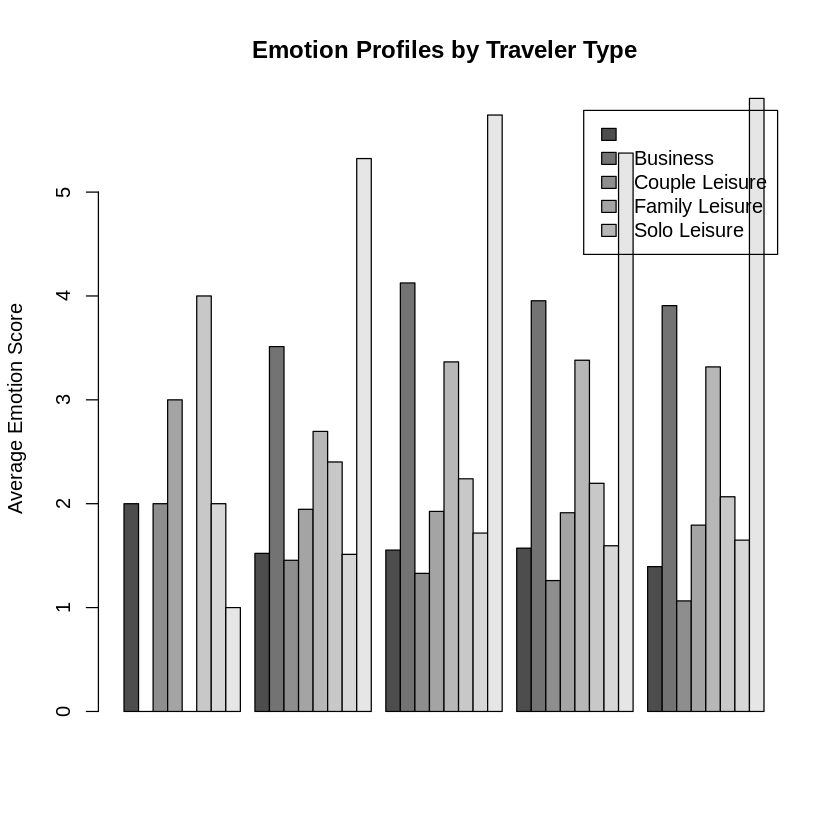

In [ ]:
# Assuming airline_reviews_df is your dataframe containing airline reviews

# Step 1: Calculate average emotion scores by traveler type
emotion_means <- aggregate(emotions_df[, 1:8], list(airline_reviews_df$traveller_type), mean)


# Step 2: Prepare data for bar plot
emotions_data <- t(emotion_means[-1])  # Transpose emotion means data, excluding the first column (traveler_type)
traveler_types <- emotion_means$Group.1  # Extract traveler types

print(emotions_data)
# Step 3: Plot bar chart of average emotion scores by traveler type
barplot(emotions_data, beside = TRUE, main = "Emotion Profiles by Traveler Type",
        legend.text = traveler_types,
        names.arg = colnames(emotions_data), ylab = "Average Emotion Score")


In [ ]:
 print(list(airline_reviews_df$traveller_type))

[[1]]
   [1] "Couple Leisure" "Business"       "Couple Leisure" "Business"      
   [5] "Couple Leisure" "Business"       "Business"       "Couple Leisure"
   [9] "Couple Leisure" "Couple Leisure" "Couple Leisure" "Couple Leisure"
  [13] "Couple Leisure" "Solo Leisure"   ""               "Solo Leisure"  
  [17] "Couple Leisure" "Business"       "Couple Leisure" "Solo Leisure"  
  [21] "Family Leisure" "Family Leisure" "Couple Leisure" "Business"      
  [25] "Business"       "Solo Leisure"   "Couple Leisure" "Couple Leisure"
  [29] "Family Leisure" "Business"       "Couple Leisure" "Solo Leisure"  
  [33] "Couple Leisure" "Family Leisure" "Solo Leisure"   "Solo Leisure"  
  [37] "Couple Leisure" "Couple Leisure" "Family Leisure" "Couple Leisure"
  [41] "Business"       "Couple Leisure" "Solo Leisure"   "Couple Leisure"
  [45] "Solo Leisure"   "Family Leisure" "Business"       "Couple Leisure"
  [49] "Family Leisure" "Business"       "Solo Leisure"   "Family Leisure"
  [53] "Couple Leis

In [ ]:


# Assuming airline_reviews_df is your dataframe containing airline reviews
NEW_df=cbind(airline_reviews_df,emotions_df)
# Step 1: Calculate average emotion scores by traveler type
emotion_means <- NEW_df %>%
  group_by(traveller_type) %>%
  summarise(avg_joy = mean(joy),
            avg_sadness = mean(sadness),
            avg_anger = mean(anger),
            avg_surprise = mean(surprise),
            avg_fear = mean(fear),
            avg_disgust = mean(disgust),
            avg_trust = mean(trust),
            avg_anticipation = mean(anticipation))

# Step 2: Display average emotion scores by traveler type
emotion_means


traveller_type,avg_joy,avg_sadness,avg_anger,avg_surprise,avg_fear,avg_disgust,avg_trust,avg_anticipation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,0.000000,4.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000
Business,2.696203,2.401899,1.522152,1.512658,1.946203,1.455696,5.322785,3.512658
Couple Leisure,3.365471,2.239910,1.553812,1.717489,1.926009,1.329596,5.742152,4.125561
Family Leisure,3.381503,2.196532,1.572254,1.595376,1.913295,1.260116,5.375723,3.953757
Solo Leisure,3.317010,2.067010,1.394330,1.649485,1.793814,1.064433,5.902062,3.907216


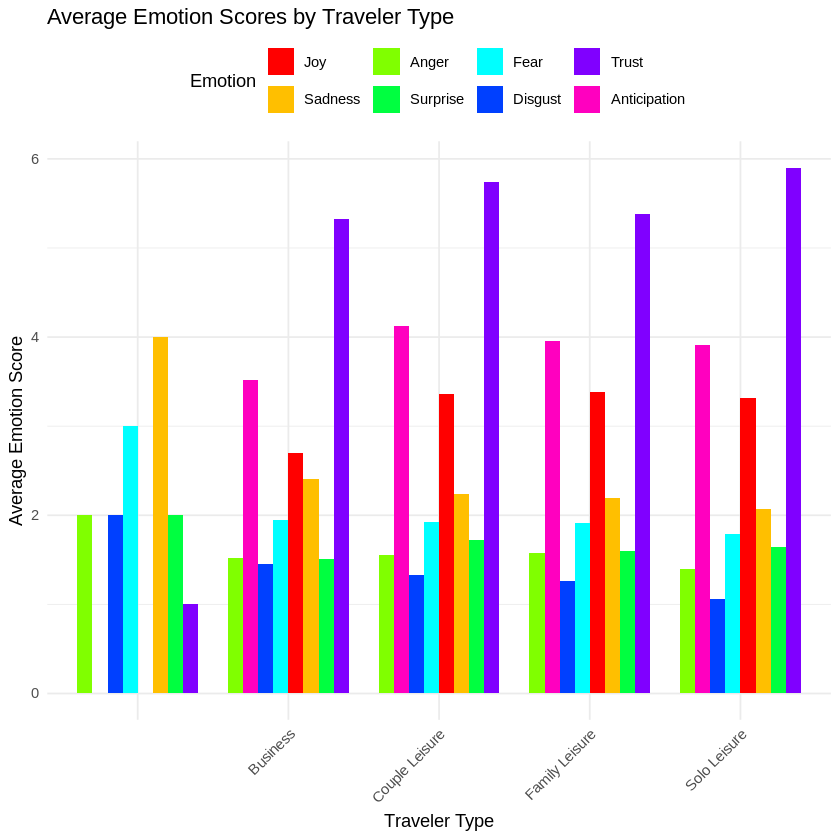

In [ ]:
# Load necessary packages
library(dplyr)    # for data manipulation
library(ggplot2)  # for visualization
library(tidyr)
# Assuming emotion_means dataframe contains the average emotion scores by traveler type
# and is structured with columns: traveller_type, avg_joy, avg_sadness, avg_anger, etc.

# Reshape data for plotting with ggplot2 (convert from wide to long format)
emotion_means_long <- emotion_means %>%
  pivot_longer(cols = starts_with("avg_"),
               names_to = "emotion",
               values_to = "average_score")

# Define order of emotions for plotting and color palette
emotion_order <- c("avg_joy", "avg_sadness", "avg_anger", "avg_surprise",
                   "avg_fear", "avg_disgust", "avg_trust", "avg_anticipation")

# Define color palette (optional: customize colors)
emotion_colors <- rainbow(length(emotion_order))

# Plot grouped bar chart using ggplot2
ggplot(emotion_means_long, aes(x = traveller_type, y = average_score, fill = emotion)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.8) +
  labs(title = "Average Emotion Scores by Traveler Type",
       x = "Traveler Type",
       y = "Average Emotion Score",
       fill = "Emotion") +
  scale_fill_manual(values = emotion_colors,
                    breaks = emotion_order,
                    labels = c("Joy", "Sadness", "Anger", "Surprise",
                               "Fear", "Disgust", "Trust", "Anticipation")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "top")  # Move legend to the top for better visibility



In [ ]:
# Install and load necessary packages
install.packages(c("tidyverse", "tidytext", "lubridate"))

library(tidyverse)   # for data manipulation and visualization
library(tidytext)    # for text mining and sentiment analysis
library(lubridate)   # for date manipulation

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages("textdata")
library("textdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



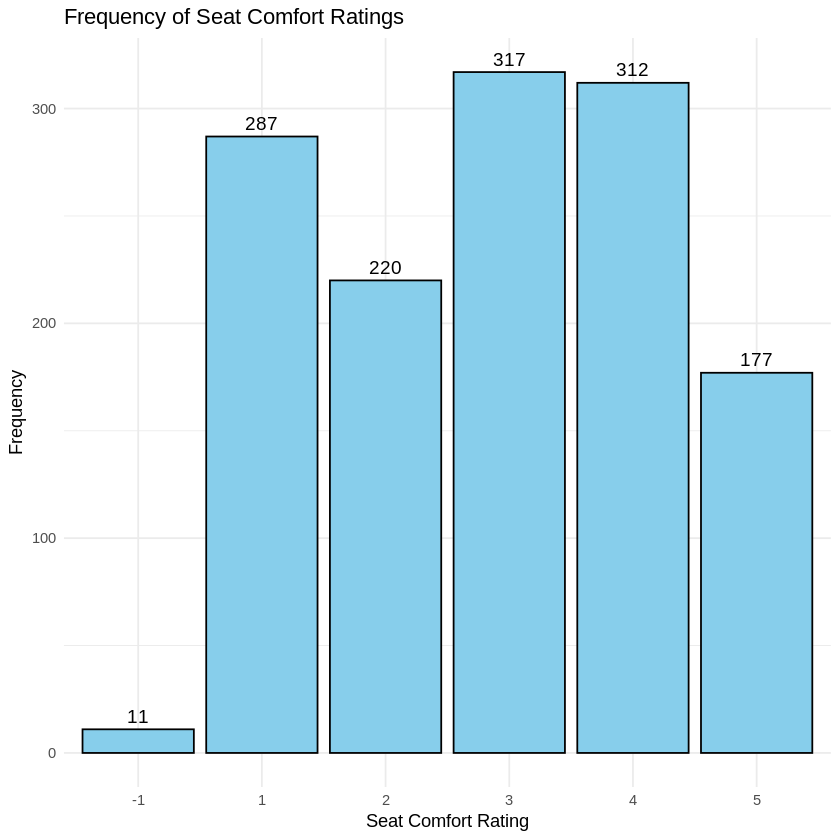

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")
library(ggplot2)
library(dplyr)
# Calculate frequency of each distinct value in 'seat_comfort' column
seat_comfort_counts <- table(airline_reviews_df$seat_comfort)

# Convert table to dataframe for plotting
seat_comfort_counts_df <- as.data.frame(seat_comfort_counts)
names(seat_comfort_counts_df) <- c("seat_comfort", "frequency")

# Create bar plot using ggplot2
ggplot(seat_comfort_counts_df, aes(x = factor(seat_comfort), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of Seat Comfort Ratings",
       x = "Seat Comfort Rating",
       y = "Frequency") +
  theme_minimal()


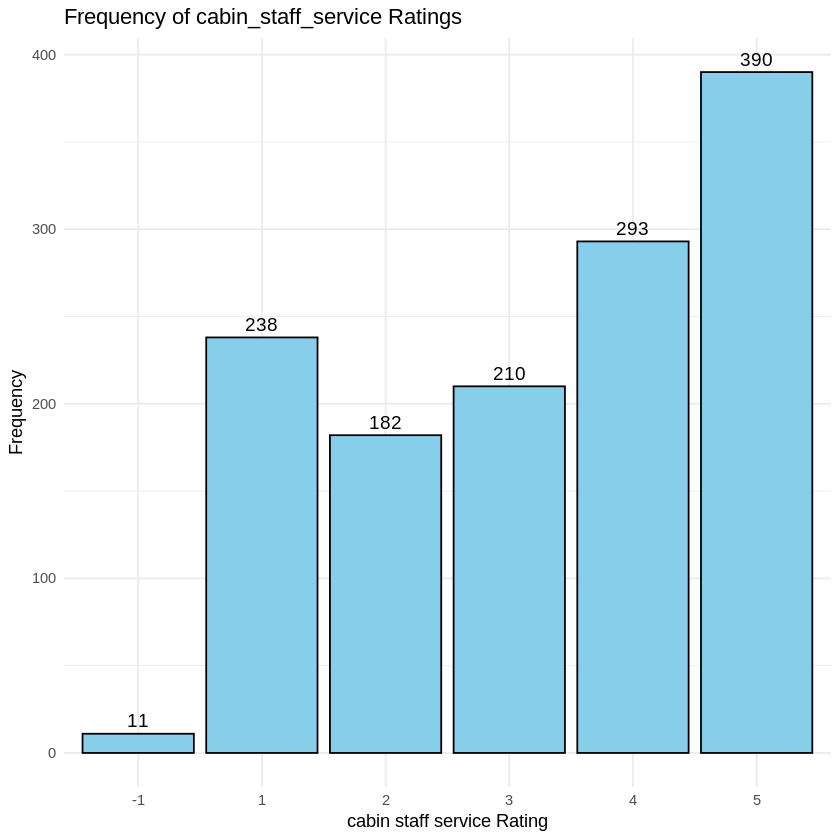

In [ ]:
# Calculate frequency of each distinct value in 'seat_comfort' column
cabin_staff_service_counts <- table(airline_reviews_df$cabin_staff_service)

# Convert table to dataframe for plotting
cabin_staff_service_counts_df <- as.data.frame(cabin_staff_service_counts)
names(cabin_staff_service_counts_df) <- c("cabin_staff_service", "frequency")

# Create bar plot using ggplot2
ggplot(cabin_staff_service_counts_df, aes(x = factor(cabin_staff_service), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of cabin_staff_service Ratings",
       x = "cabin staff service Rating",
       y = "Frequency") +
  theme_minimal()

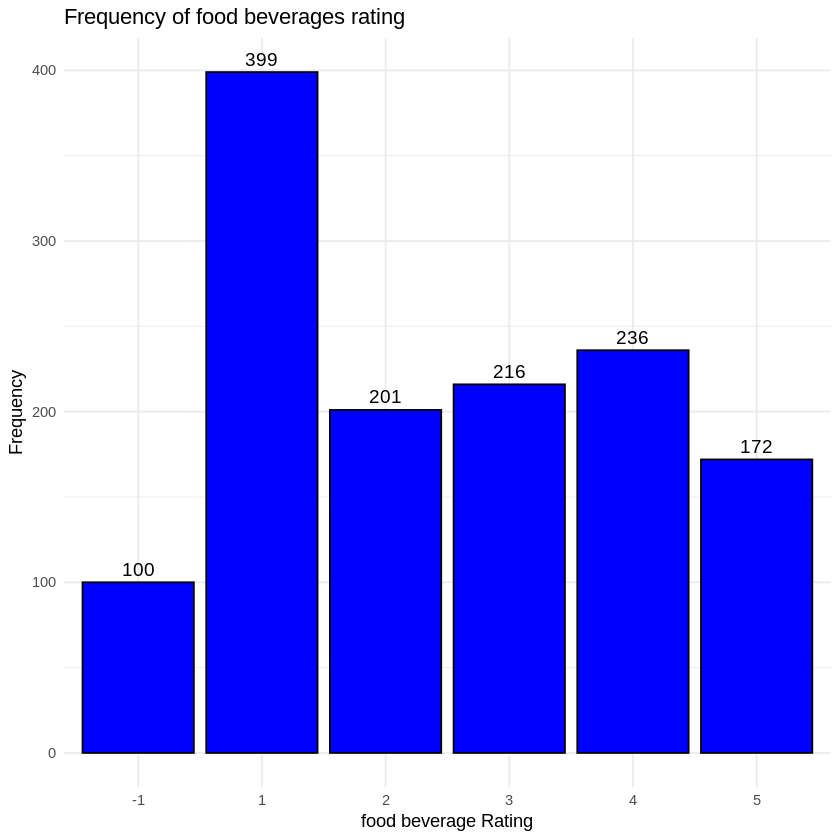

In [ ]:
# Calculate frequency of each distinct value in 'food_beverages' column
food_beverages_counts <- table(airline_reviews_df$food_beverages)

# Convert table to dataframe for plotting
food_beverages_counts_df <- as.data.frame(food_beverages_counts)
names(food_beverages_counts_df) <- c("food_beverages", "frequency")

# Create bar plot using ggplot2
ggplot(food_beverages_counts_df, aes(x = factor(food_beverages), y = frequency)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of food beverages rating",
       x = "food beverage Rating",
       y = "Frequency") +
  theme_minimal()


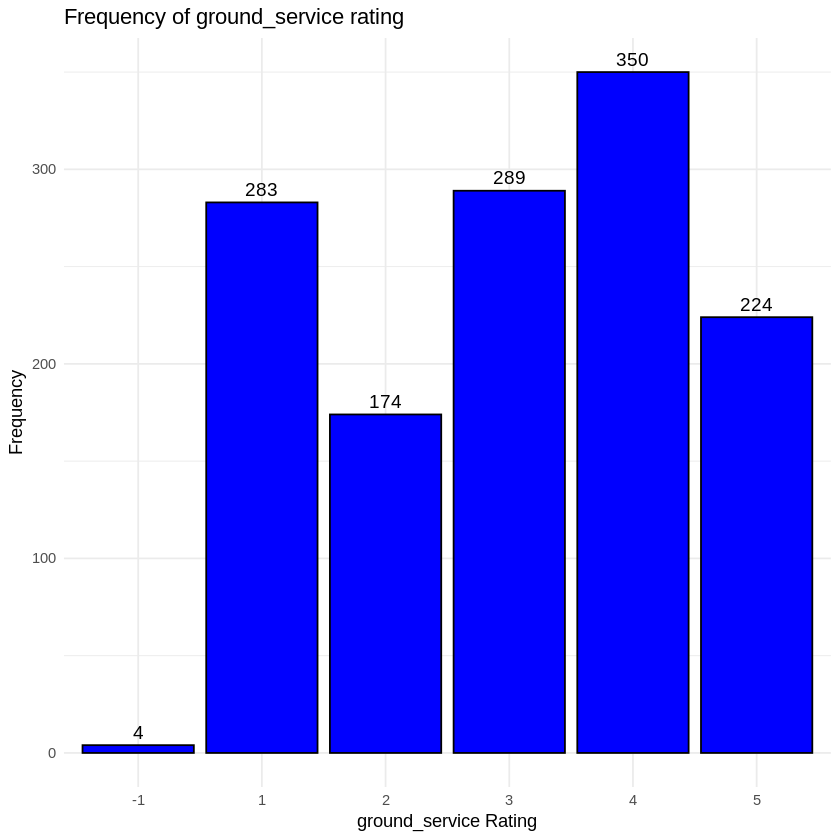

In [ ]:
# Calculate frequency of each distinct value in 'ground_service' column
ground_service_counts <- table(airline_reviews_df$ground_service)

# Convert table to dataframe for plotting
ground_service_counts_df <- as.data.frame(ground_service_counts)
names(ground_service_counts_df) <- c("ground_service", "frequency")

# Create bar plot using ggplot2
ggplot(ground_service_counts_df, aes(x = factor(ground_service), y = frequency)) +
  geom_bar(stat = "identity", fill = "blue", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of ground_service rating",
       x = "ground_service Rating",
       y = "Frequency") +
  theme_minimal()


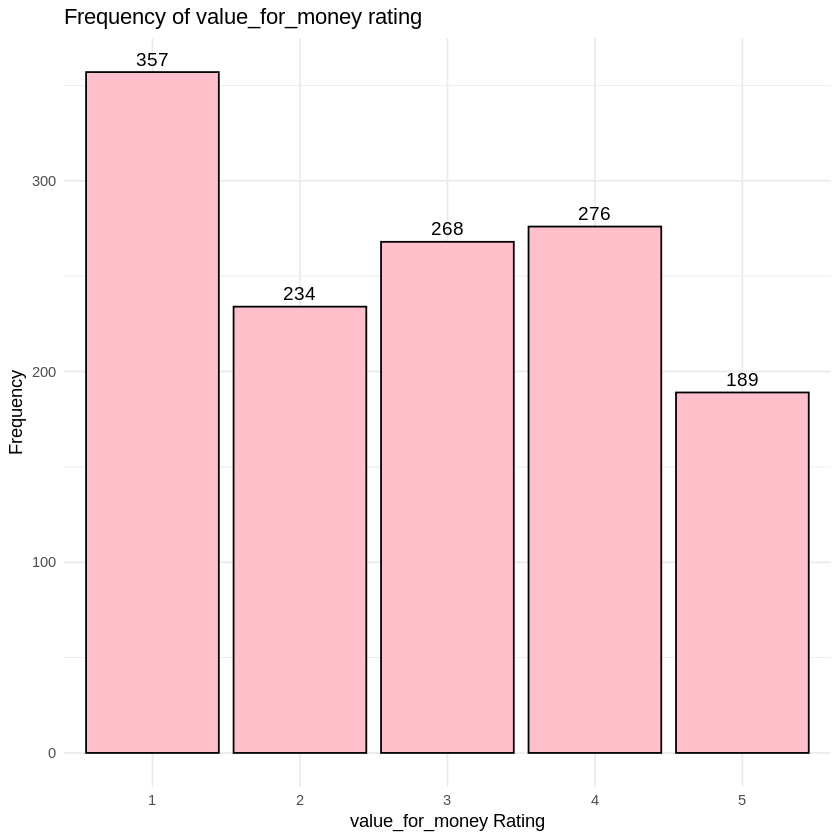

In [ ]:
# Calculate frequency of each distinct value in 'value_for_money' column
value_for_money_counts <- table(airline_reviews_df$value_for_money)

# Convert table to dataframe for plotting
value_for_money_counts_df <- as.data.frame(value_for_money_counts)
names(value_for_money_counts_df) <- c("value_for_money", "frequency")

# Create bar plot using ggplot2
ggplot(value_for_money_counts_df, aes(x = factor(value_for_money), y = frequency)) +
  geom_bar(stat = "identity", fill = "pink", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of value_for_money rating",
       x = "value_for_money Rating",
       y = "Frequency") +
  theme_minimal()


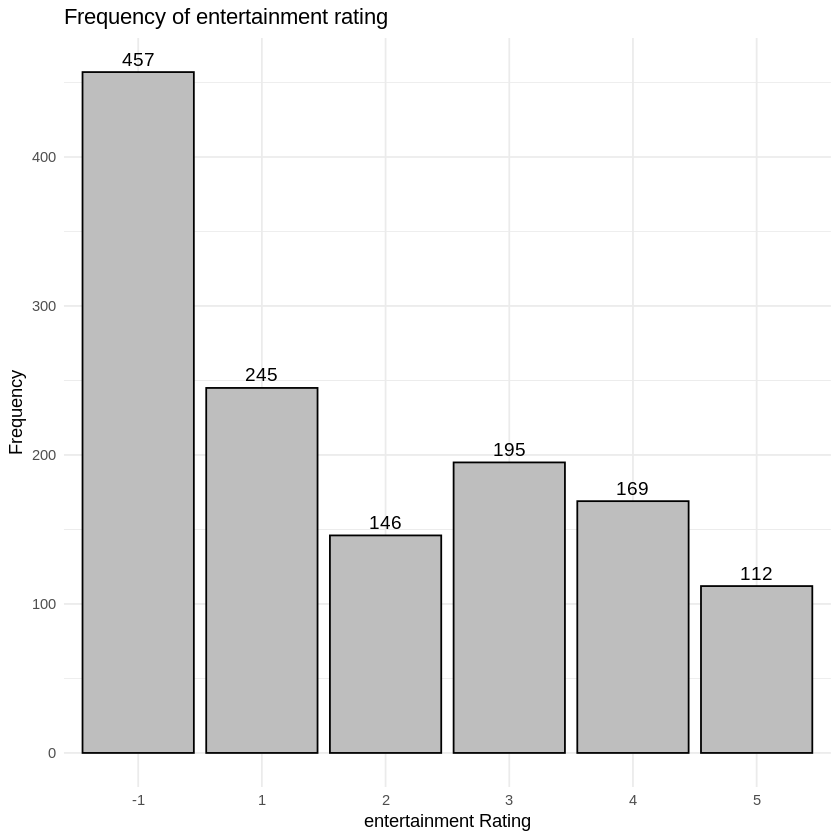

In [ ]:
# Calculate frequency of each distinct value in 'entertainment' column
entertainment_counts <- table(airline_reviews_df$entertainment)

# Convert table to dataframe for plotting
entertainment_counts_df <- as.data.frame(entertainment_counts)
names(entertainment_counts_df) <- c("entertainment", "frequency")

# Create bar plot using ggplot2
ggplot(entertainment_counts_df, aes(x = factor(entertainment), y = frequency)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add text labels on top of bars
  labs(title = "Frequency of entertainment rating",
       x = "entertainment Rating",
       y = "Frequency") +
  theme_minimal()


In [ ]:
install.packages("tidyverse")
install.packages("tm")
# Load required libraries
library(tidyverse)
library(tm)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3"),
  author = c("John", "Jane", "Doe"),
  content = c(
    "The flight was delayed and the seats were uncomfortable.",
    "Poor cabin service and food quality.",
    "I had a terrible experience with the ground service."
  ),
  stringsAsFactors = FALSE
)

# Function to preprocess text (remove punctuation, convert to lowercase, etc.)
preprocess_text <- function(text) {
  # Convert text to lowercase
  text <- tolower(text)

  # Remove punctuation
  text <- gsub("[[:punct:]]", " ", text)

  # Remove numbers
  text <- gsub("[[:digit:]]", "", text)

  # Remove extra white spaces
  text <- gsub("\\s+", " ", text)

  # Trim leading and trailing white spaces
  text <- trimws(text)

  return(text)
}

# Preprocess the 'content' column
airline_reviews_df$content <- sapply(airline_reviews_df$content, preprocess_text)

# Create a corpus for text mining
corpus <- Corpus(VectorSource(airline_reviews_df$content))

# Text mining preprocessing: remove stopwords, stem words
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stemDocument)

# Convert the corpus to a document-term matrix
dtm <- DocumentTermMatrix(corpus)

# Convert the document-term matrix to a matrix and then to a dataframe
term_freq <- as.data.frame(as.matrix(dtm))

# Summarize the most frequent terms (complaints/issues)
term_freq_summary <- colSums(term_freq)

# Sort terms by frequency in descending order
term_freq_summary <- sort(term_freq_summary, decreasing = TRUE)

# Display the top frequent terms (complaints/issues)
num_top_terms <- 10  # Number of top terms to display
top_terms <- head(term_freq_summary, num_top_terms)

# Print the top frequent terms
print(top_terms)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
“transformation drops documents”


flight   seat servic   crew london   time   food  cabin   good  class 
  2892   1944   1203   1006    983    974    960    874    870    846 


In [ ]:
# Install required packages
install.packages(c("tm", "SnowballC"))
library(tm)
library(SnowballC)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3"),
  author = c("John", "Jane", "Doe"),
  content = c(
    "The flight was delayed and the seats were uncomfortable.",
    "Poor cabin service and food quality.",
    "I had a terrible experience with the ground service."
  ),
  stringsAsFactors = FALSE
)

# Function to preprocess text (remove punctuation, convert to lowercase, etc.)
preprocess_text <- function(text) {
  text <- tolower(text)
  text <- gsub("[[:punct:]]", " ", text)
  text <- gsub("[[:digit:]]", "", text)
  text <- gsub("\\s+", " ", text)
  text <- trimws(text)
  return(text)
}

# Preprocess the 'content' column
airline_reviews_df$content <- sapply(airline_reviews_df$content, preprocess_text)

# Create a corpus for text mining
corpus <- Corpus(VectorSource(airline_reviews_df$content))

# Text mining preprocessing
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stemDocument)

# Convert the corpus to a document-term matrix
dtm <- DocumentTermMatrix(corpus)

# Convert the document-term matrix to a matrix and then to a dataframe
term_freq <- as.data.frame(as.matrix(dtm))

# Summarize the most frequent terms (complaints/issues)
term_freq_summary <- colSums(term_freq)

# Sort terms by frequency in descending order
term_freq_summary <- sort(term_freq_summary, decreasing = TRUE)

# Display the top frequent terms (complaints/issues)
num_top_terms <- 10  # Number of top terms to display
top_terms <- head(term_freq_summary, num_top_terms)

# Print the top frequent terms
print(top_terms)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
“transformation drops documents”


flight   seat servic   crew london   time   food  cabin   good  class 
  2892   1944   1203   1006    983    974    960    874    870    846 


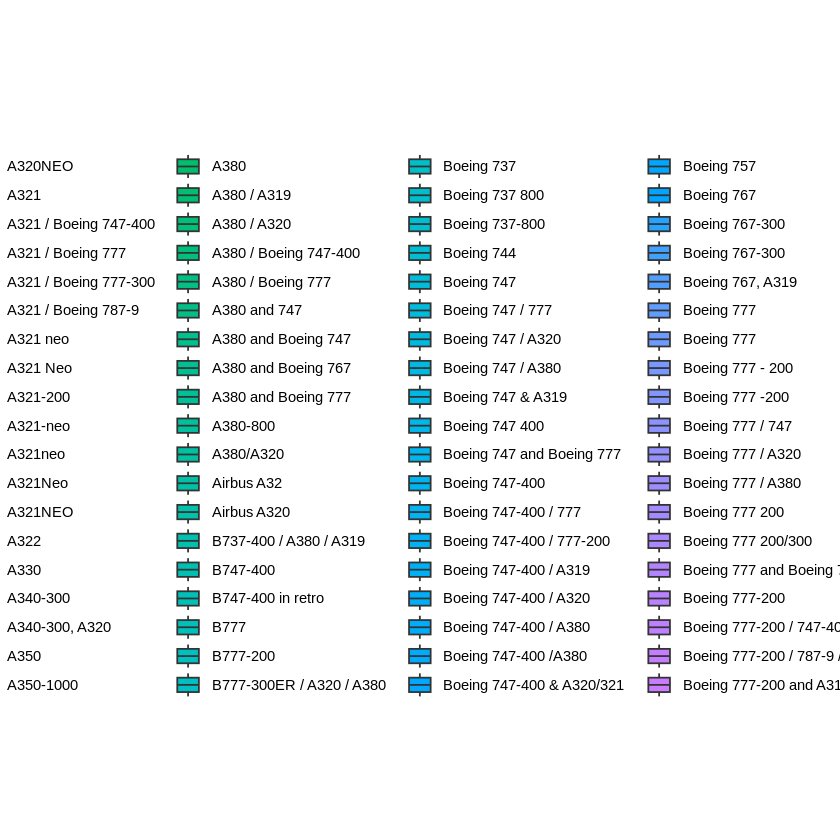

In [ ]:
library(ggplot2)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3", "Review 4", "Review 5"),
  aircraft = c("Boeing 737", "Airbus A320", "Boeing 737", "Boeing 747", "Airbus A320"),
  rating = c(4, 3, 2, 5, 4)
)

# Plotting reviews across different aircraft types
ggplot(airline_reviews_df, aes(x = aircraft, y = rating, fill = aircraft)) +
  geom_boxplot() +  # Create boxplot for ratings by aircraft type
  labs(
    title = "Comparison of Reviews Across Aircraft Types",
    x = "Aircraft Type",
    y = "Rating",
    fill = "Aircraft Type"
  ) +
  theme_minimal()

In [ ]:
# Load required libraries
install.packages(c("tidytext","syuzhet"))

library(tidyverse)
library(tidytext)
library(syuzhet)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3"),
  content = c(
    "The flight was delayed but the seats were comfortable.",
    "Poor cabin service and food quality.",
    "I had a great experience with the friendly cabin crew."
  ),
  stringsAsFactors = FALSE
)

# Perform sentiment analysis using the syuzhet package
sentiments <- get_sentiment(airline_reviews_df$content, method = "afinn")

# Add sentiment scores to the review dataframe
airline_reviews_df$sentiment_score <- sentiments$sentiment

# Classify sentiment into categories (positive, neutral, negative)
airline_reviews_df$sentiment_category <- case_when(
  airline_reviews_df$sentiment_score > 0 ~ "Positive",
  airline_reviews_df$sentiment_score == 0 ~ "Neutral",
  airline_reviews_df$sentiment_score < 0 ~ "Negative"
)

# Display the sentiment analysis results
print(airline_reviews_df[, c("content", "sentiment_category")])


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in sentiments$sentiment: $ operator is invalid for atomic vectors


In [ ]:
install.packages("textdata")
library(textdata)
# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3"),
  content = c(
    "The flight was delayed but the seats were comfortable.",
    "Poor cabin service and food quality.",
    "I had a great experience with the friendly cabin crew."
  ),
  stringsAsFactors = FALSE
)

# Tokenize the review text and perform sentiment analysis
sentiment_scores <- airline_reviews %>%
  mutate(review_id = row_number()) %>%
  unnest_tokens(word, content) %>%
  inner_join(get_sentiments("afinn"), by = "word") %>%
  group_by(review_id) %>%
  summarise(sentiment_score = sum(score)) %>%
  mutate(sentiment_category = case_when(
    sentiment_score > 0 ~ "Positive",
    sentiment_score == 0 ~ "Neutral",
    sentiment_score < 0 ~ "Negative"
  ))

# Merge sentiment analysis results back to the original dataframe
airline_reviews <- airline_reviews %>%
  left_join(sentiment_scores, by = "review_id") %>%
  select(-review_id)  # Remove the temporary review_id column

# Display the sentiment analysis results
print(airline_reviews[, c("content", "sentiment_category")])


In [ ]:
# Load required libraries
install.packages("topicmodels")
library(tidyverse)
library(tm)
library(topicmodels)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3", "Review 4", "Review 5"),
  content = c(
    "The flight was delayed but the seats were comfortable.",
    "Poor cabin service and food quality.",
    "I had a great experience with the friendly cabin crew.",
    "The legroom was inadequate.",
    "The entertainment options were good."
  ),
  stringsAsFactors = FALSE
)

# Create a corpus from the review text
corpus <- Corpus(VectorSource(airline_reviews$content))

# Text preprocessing: convert to lowercase, remove punctuation and numbers
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)

# Create a Document-Term Matrix (DTM)
dtm <- DocumentTermMatrix(corpus)

# Set number of topics (adjust as needed)
num_topics <- 3

# Run LDA model
lda_model <- LDA(dtm, k = num_topics, control = list(seed = 123))

# Display the top terms for each topic
terms_per_topic <- 10  # Number of top terms to display per topic
topics <- as.data.frame(top_terms(lda_model, terms_per_topic))

# Print the topics
cat("Topics from Airline Reviews:\n")
for (i in 1:num_topics) {
  cat(paste("Topic", i, ":", paste(topics$term[topics$topic == i], collapse = ", "), "\n"))
}


In [ ]:
# Load required libraries
library(tidyverse)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3", "Review 4", "Review 5"),
  author = c("John", "Mary", "David", "Sarah", "Michael"),
  place = c("New York", "London", "Paris", "Tokyo", "Sydney"),
  content = c(
    "The flight was delayed but the seats were comfortable.",
    "Poor cabin service and food quality.",
    "I had a great experience with the friendly cabin crew.",
    "The legroom was inadequate.",
    "The entertainment options were good."
  ),
  seat_type = c("First Class", "Economy", "Business Class", "Premium Economy", "Economy"),
  rating = c(3, 2, 5, 2, 4),
  stringsAsFactors = FALSE
)

# Calculate average rating for each seat type
seat_type_satisfaction <- airline_reviews_df %>%
  group_by(seat_type) %>%
  summarize(avg_rating = mean(rating, na.rm = TRUE))

# Create comparison plot using ggplot2
comparison_plot <- ggplot(seat_type_satisfaction, aes(x = seat_type, y = avg_rating)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.8) +
  labs(
    title = "Comparison of Seat Types' Satisfaction",
    x = "Seat Type",
    y = "Average Rating"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the comparison plot
print(comparison_plot)


In [ ]:
# Load required libraries
library(tidyverse)

# Sample airline review dataframe (replace with your actual dataframe)
airline_reviews <- data.frame(
  header = c("Review 1", "Review 2", "Review 3", "Review 4", "Review 5"),
  author = c("John", "Mary", "David", "Sarah", "Michael"),
  place = c("New York", "London", "Paris", "Tokyo", "Sydney"),
  content = c(
    "The flight was excellent. Highly recommended.",
    "Poor cabin service and food quality.",
    "I had a great experience with the friendly cabin crew.",
    "The legroom was inadequate.",
    "The entertainment options were good. Highly recommended."
  ),
  aircraft = c("Boeing 747", "Airbus A320", "Boeing 787", "Airbus A380", "Boeing 737"),
  recommended = c("Yes", "No", "Yes", "No", "Yes"),
  stringsAsFactors = FALSE
)

# Filter data to keep only recommended flights
recommended_flights <- airline_reviews %>%
  filter(recommended == "Yes")

# Count frequencies of recommendations for each aircraft type
recommendation_freq <- recommended_flights %>%
  group_by(aircraft) %>%
  summarise(frequency = n())

# Sort frequencies in descending order for plotting
recommendation_freq <- recommendation_freq %>%
  arrange(desc(frequency))

# Create a bar plot of aircraft vs. frequency of recommendations
ggplot(recommendation_freq, aes(x = aircraft, y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.8) +
  labs(
    title = "Frequency of Recommendations for Each Aircraft Type",
    x = "Aircraft Type",
    y = "Frequency of Recommendations"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
# Load required libraries
library(tidyverse)
airline_reviews_df=read.csv("/content/preprocessed_airline_dataset.csv")
# Sample airline review dataframe (replace with your actual dataframe)


# Filter data to keep only recommended flights
recommended_flights <- airline_reviews_df %>%
  filter(recommended == "Yes")

# Count frequencies of recommendations for each aircraft type
recommendation_freq <- recommended_flights %>%
  group_by(aircraft) %>%
  summarise(frequency = n()) %>%
  arrange(desc(frequency))

# Create a bar plot of aircraft vs. frequency of recommendations
ggplot(recommendation_freq, aes(x = aircraft, y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.8) +
  geom_text(aes(label = frequency), vjust = -0.5, size = 4) +  # Add frequency labels on top of bars
  labs(
    title = "Frequency of Recommendations for Each Aircraft Type",
    x = "Aircraft Type",
    y = "Frequency of Recommendations"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
